In [1]:
import pandas as pd
students_data = pd.read_csv("studentsMarks20.csv")
print(students_data)

    Id     Student's Name  Maths  Science  Hindi  English  Social Studies
0    1        Amit Sharma   80.0     98.0   82.0     51.0            92.0
1    2         Neha Verma   55.0     96.0   93.0     67.0            61.0
2    3        Rahul Gupta   54.0     57.0   62.0      NaN            68.0
3    4        Priya Singh   75.0     66.0   85.0     57.0            60.0
4    5       Vikram Patel   59.0     61.0   54.0     78.0            97.0
5    6          Rohan Das   93.0     57.0   57.0     68.0             NaN
6    7        Ananya Iyer  999.0     92.0  999.0     57.0            91.0
7    8        Kunal Joshi   95.0     53.0   91.0      NaN            76.0
8    9         Sneha Nair   54.0     58.0    NaN     53.0            73.0
9    9         Sneha Nair   54.0     58.0    NaN     53.0            73.0
10  10        Arjun Mehta   82.0     82.0   79.0     89.0            64.0
11  11        Pooja Reddy   97.0     59.0   68.0     90.0            91.0
12  12  Saurabh Choudhary   85.0     6

In [2]:
#identifying null values
identify_values = students_data.isnull()
print("Identifying missing values:")
print(identify_values)

Identifying missing values:
       Id  Student's Name  Maths  Science  Hindi  English  Social Studies
0   False           False  False    False  False    False           False
1   False           False  False    False  False    False           False
2   False           False  False    False  False     True           False
3   False           False  False    False  False    False           False
4   False           False  False    False  False    False           False
5   False           False  False    False  False    False            True
6   False           False  False    False  False    False           False
7   False           False  False    False  False     True           False
8   False           False  False    False   True    False           False
9   False           False  False    False   True    False           False
10  False           False  False    False  False    False           False
11  False           False  False    False  False    False           False
12  False 

In [3]:
#calculating total null values 
count_values = students_data.isnull().sum()
print("Number of missing values: ")
print(count_values)

Number of missing values: 
Id                0
Student's Name    0
Maths             1
Science           0
Hindi             2
English           4
Social Studies    2
dtype: int64


In [4]:
#Dropping duplicate rows.
print("Removing Duplicate Rows: ")
students_data.drop_duplicates(inplace=True)
print(students_data)

Removing Duplicate Rows: 
    Id     Student's Name  Maths  Science  Hindi  English  Social Studies
0    1        Amit Sharma   80.0     98.0   82.0     51.0            92.0
1    2         Neha Verma   55.0     96.0   93.0     67.0            61.0
2    3        Rahul Gupta   54.0     57.0   62.0      NaN            68.0
3    4        Priya Singh   75.0     66.0   85.0     57.0            60.0
4    5       Vikram Patel   59.0     61.0   54.0     78.0            97.0
5    6          Rohan Das   93.0     57.0   57.0     68.0             NaN
6    7        Ananya Iyer  999.0     92.0  999.0     57.0            91.0
7    8        Kunal Joshi   95.0     53.0   91.0      NaN            76.0
8    9         Sneha Nair   54.0     58.0    NaN     53.0            73.0
10  10        Arjun Mehta   82.0     82.0   79.0     89.0            64.0
11  11        Pooja Reddy   97.0     59.0   68.0     90.0            91.0
12  12  Saurabh Choudhary   85.0     69.0  999.0     75.0             NaN
13  13      

In [5]:
#Corrected index of the dataframe after removal of duplicate rows
list = [i for i in range(len(students_data))]
students_data.index = list
print(students_data)
print("\n")
print(students_data.columns)

    Id     Student's Name  Maths  Science  Hindi  English  Social Studies
0    1        Amit Sharma   80.0     98.0   82.0     51.0            92.0
1    2         Neha Verma   55.0     96.0   93.0     67.0            61.0
2    3        Rahul Gupta   54.0     57.0   62.0      NaN            68.0
3    4        Priya Singh   75.0     66.0   85.0     57.0            60.0
4    5       Vikram Patel   59.0     61.0   54.0     78.0            97.0
5    6          Rohan Das   93.0     57.0   57.0     68.0             NaN
6    7        Ananya Iyer  999.0     92.0  999.0     57.0            91.0
7    8        Kunal Joshi   95.0     53.0   91.0      NaN            76.0
8    9         Sneha Nair   54.0     58.0    NaN     53.0            73.0
9   10        Arjun Mehta   82.0     82.0   79.0     89.0            64.0
10  11        Pooja Reddy   97.0     59.0   68.0     90.0            91.0
11  12  Saurabh Choudhary   85.0     69.0  999.0     75.0             NaN
12  13        Divya Bhatt   89.0     8

In [6]:
# Fix column names incase,columns have white spaces
students_data.columns = students_data.columns.str.strip()  # Remove extra spaces
print("Available columns:", students_data.columns.tolist())

Available columns: ['Id', "Student's Name", 'Maths', 'Science', 'Hindi', 'English', 'Social Studies']


In [7]:
# Detect the outliers and remove the rows having outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    

# #Apply the function to the main column containing integer values
df_no_outliers = students_data.copy()
for column in ['Maths', 'Science', 'Hindi', 'English', 'Social Studies']:
    df_no_outliers = remove_outliers(df_no_outliers, column)
print(df_no_outliers)

print("Finally cleaned DataFrame by removing outliers and duplicate.")
 

    Id    Student's Name  Maths  Science  Hindi  English  Social Studies
0    1       Amit Sharma   80.0     98.0   82.0     51.0            92.0
1    2        Neha Verma   55.0     96.0   93.0     67.0            61.0
3    4       Priya Singh   75.0     66.0   85.0     57.0            60.0
4    5      Vikram Patel   59.0     61.0   54.0     78.0            97.0
9   10       Arjun Mehta   82.0     82.0   79.0     89.0            64.0
10  11       Pooja Reddy   97.0     59.0   68.0     90.0            91.0
12  13       Divya Bhatt   89.0     86.0   50.0     71.0            56.0
14  15         Kavya Rao   87.0     52.0   69.0     89.0            92.0
18  19      Shruti Desai   71.0     88.0   99.0     76.0            82.0
19  20  Siddharth Saxena   52.0     96.0   53.0     56.0            69.0
Finally cleaned DataFrame by removing outliers and duplicate.


In [8]:
#fixing index of the cleaned dataframe
list = [i for i in range(len(df_no_outliers))]
df_no_outliers.index = list
df_no_outliers

,Id,Student's Name,Maths,Science,Hindi,English,Social Studies
0,1,Amit Sharma,80.0,98.0,82.0,51.0,92.0
1,2,Neha Verma,55.0,96.0,93.0,67.0,61.0
2,4,Priya Singh,75.0,66.0,85.0,57.0,60.0
3,5,Vikram Patel,59.0,61.0,54.0,78.0,97.0
4,10,Arjun Mehta,82.0,82.0,79.0,89.0,64.0
5,11,Pooja Reddy,97.0,59.0,68.0,90.0,91.0
6,13,Divya Bhatt,89.0,86.0,50.0,71.0,56.0
7,15,Kavya Rao,87.0,52.0,69.0,89.0,92.0
8,19,Shruti Desai,71.0,88.0,99.0,76.0,82.0
9,20,Siddharth Saxena,52.0,96.0,53.0,56.0,69.0


In [9]:
# Created a new column named "Total Marks" in df_no_outliers
# which shows total marks scored by each student in all five subjects

df_columns = df_no_outliers.columns
col= df_columns[2:]
df_new =  df_no_outliers[col]
df_no_outliers["Total Marks"] = df_new[col].sum(axis=1)
df_no_outliers


,Id,Student's Name,Maths,Science,Hindi,English,Social Studies,Total Marks
0,1,Amit Sharma,80.0,98.0,82.0,51.0,92.0,403.0
1,2,Neha Verma,55.0,96.0,93.0,67.0,61.0,372.0
2,4,Priya Singh,75.0,66.0,85.0,57.0,60.0,343.0
3,5,Vikram Patel,59.0,61.0,54.0,78.0,97.0,349.0
4,10,Arjun Mehta,82.0,82.0,79.0,89.0,64.0,396.0
5,11,Pooja Reddy,97.0,59.0,68.0,90.0,91.0,405.0
6,13,Divya Bhatt,89.0,86.0,50.0,71.0,56.0,352.0
7,15,Kavya Rao,87.0,52.0,69.0,89.0,92.0,389.0
8,19,Shruti Desai,71.0,88.0,99.0,76.0,82.0,416.0
9,20,Siddharth Saxena,52.0,96.0,53.0,56.0,69.0,326.0


In [10]:
# Identifying correlated attributes
corr_matrix = df_no_outliers[['Science', 'English']].corr()
most_positively_correlated = corr_matrix.max()
most_negatively_correlated = corr_matrix.min()

print("Most Positively Correlated attributes: ")
print(most_positively_correlated)
print("Most Negatively Correlated attributes: ")
print(most_negatively_correlated)

Most Positively Correlated attributes: 
Science    1.0
English    1.0
dtype: float64
Most Negatively Correlated attributes: 
Science   -0.620936
English   -0.620936
dtype: float64


In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset from Seaborn
df = sns.load_dataset("titanic")

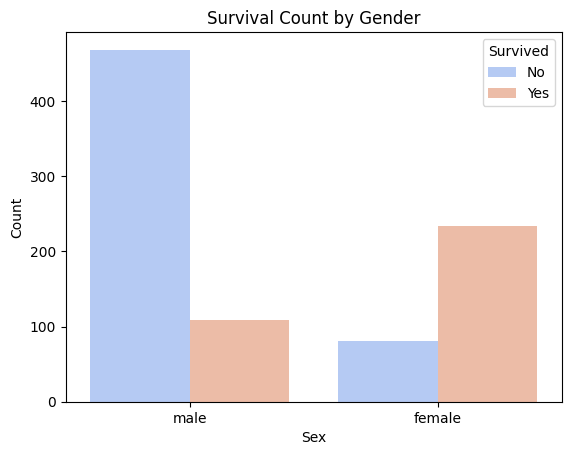

In [12]:
# (a) Bar chart: Frequency of survivors and non-survivors for male and female passengers
sns.countplot(x="sex", hue="survived", data=df, palette="coolwarm")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

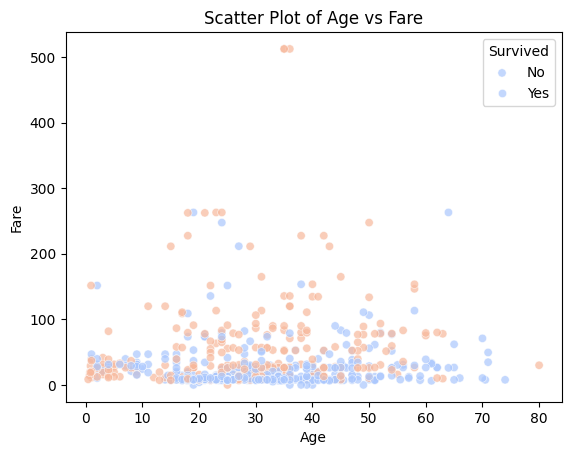

In [13]:
# (b) Scatter plot for two selected features: Age vs Fare
sns.scatterplot(x=df["age"], y=df["fare"], hue=df["survived"], palette="coolwarm", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Age vs Fare")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

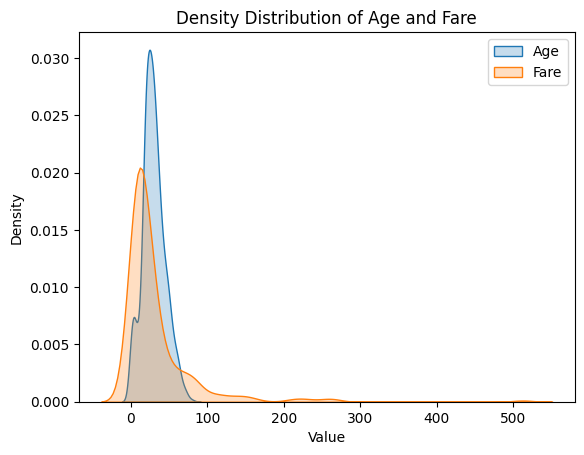

In [14]:
# (c) Density distribution for Age and Fare
sns.kdeplot(df["age"].dropna(), fill=True, label="Age")
sns.kdeplot(df["fare"].dropna(), fill=True, label="Fare")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Density Distribution of Age and Fare")
plt.legend()
plt.show()

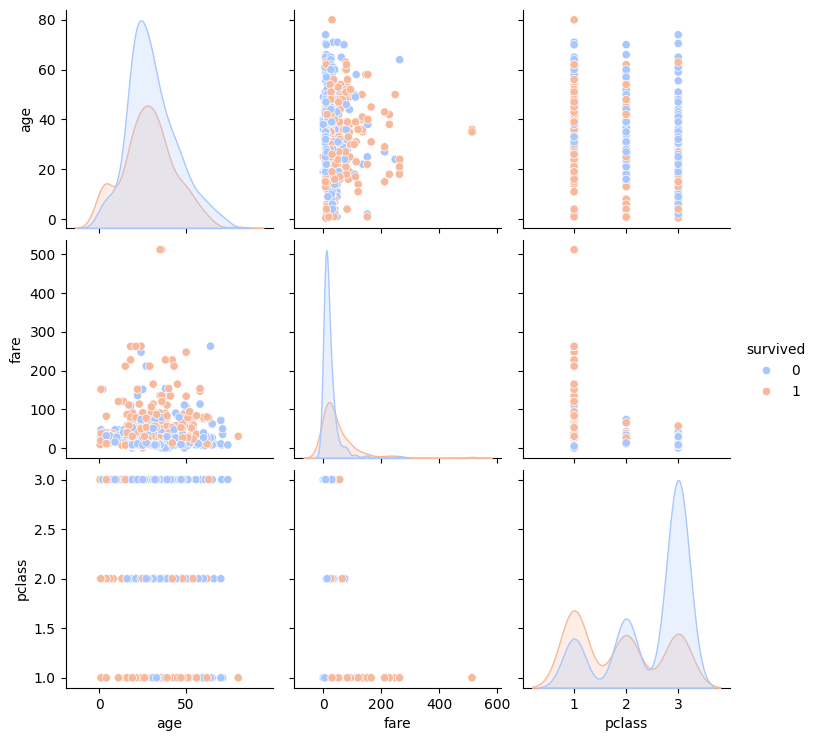

In [15]:
# (d) Pair plot to show pairwise bivariate distribution
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']].dropna(), hue='survived', palette="coolwarm")
plt.show()

In [16]:
# (4a) Find total number of passengers with age less than 30
young_passengers = df[df["age"] < 30].shape[0]
print(f"Total passengers with age less than 30: {young_passengers}")

Total passengers with age less than 30: 384


In [17]:
# (4b) Find total fare paid by passengers of first class
total_fare_first_class = df[df["pclass"] == 1]["fare"].sum()
print(f"Total fare paid by first-class passengers: {total_fare_first_class:.2f}")

Total fare paid by first-class passengers: 18177.41


In [18]:
# (4c) Compare number of survivors of each passenger class
survival_by_class = df.groupby("pclass")["survived"].sum()
print("Survivors by Passenger Class:")
print(survival_by_class)

Survivors by Passenger Class:
pclass
1    136
2     87
3    119
Name: survived, dtype: int64


In [19]:
#Question 2: import iris date using sklearn library or download it 
#a. Compute mean, median , mode, standard deviation, confidence interval and standard error for each feature.
#b. Compute correlation coefficients between each pair of features and plot heatmap
#c. Find covariance between length of sepal and petal
#d. Build contigency table for class feature.

In [20]:
import pandas as pd 
import numpy as np 
import scipy.stats as sts
iris

NameError: name 'iris' is not defined